## <b> Latar Belakang </b>

Prediksi Persetujuan Pinjaman dibuat untuk membantu bank menyelesaikan masalah dalam menilai apakah pemohon pinjaman layak mendapatkan pinjaman atau tidak. Bank biasanya mengevaluasi banyak hal seperti riwayat kredit, pendapatan, dan tanggungan, secara manual. Dengan menggunakan model ini, kita dapat memprediksi persetujuan pinjaman dengan lebih objektif untuk mengurangi risiko kecenderungan yang dapat mempengaruhi keputusan dan memastikan setiap pemohon pinjaman diperlakukan secara adil. Selain itu, aplikasi ini membantu bank memberikan keputusan lebih cepat, sesuai dengan harapan pemohon pinjaman yang ingin proses yang mudah dan cepat. Tujuannya adalah membuat proses persetujuan pinjaman lebih efisien, akurat, adil, dan ramah pengguna.

# 1. Import Libraries

In [1]:
# Import libraries yang dibutuhkan
import pandas as pd
import numpy as np
from scipy import stats

# Libraries yang digunakan untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library yang digunakan untuk menghitung koefisien korelasi Kendall Tau
from scipy.stats import kendalltau
from scipy.stats import skew

# Library untuk balancing data
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

# Library yang digunakan untuk membuat Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Library yang digunakan untuk modeling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


# Library yang digunakan untuk pra-pemrosesan data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Library yang digunakan untuk model evaluasi
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, recall_score, precision_score

# Library yang digunakan untuk split data
from sklearn.model_selection import train_test_split

# Library yang digunakan untuk pengecekan VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library yang digunakan untuk scalling dan encoding
from sklearn.preprocessing import StandardScaler

# Library yang digunakan untuk handling outlier
from feature_engine.outliers import Winsorizer

# Library yang digunakan untuk menyimpan model
import pickle
import joblib

from warnings import filterwarnings
filterwarnings('ignore')

# 2. Data Loading

Data loading berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama untuk dataset yang digunakan, mengecek ukuran dataset, dan lain-lain.

In [2]:
loan = pd.read_csv('loan_approval_dataset.csv')

## Menampilkan 10 Data Teratas dan 10 Data Terbawah

In [3]:
# Menampilkan data 10 teratas
print('10 Data Teratas: ')
display(loan.head(10))

# Menampilkan data 10 terbawah
print('10 Data Terbawah: ')
display(loan.tail(10))

10 Data Teratas: 


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


10 Data Terbawah: 


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4260,4261,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


Data 10 teratas dan 10 terbawah sudah berhasil ditampilkan, selanjutnya pengecekan informasi data

## Menampilkan Informasi Data

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Data yang ditampilkan memiliki 13 kolom dan 4269 baris, dimana pada data tersebut terdapat 10 kolom dengan tipe int64, dan 3 kolom dengan tipe object. 

In [5]:
# Menampilkan Daftar Kolom dalam Bentuk List
list(loan.columns)

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

Informasi diatas merupakan informasi nama-nama kolom didalam dataset. Namun jika dilihat nama kolom diatas terdapat nama kolom yang berisi spasi kosong. Maka dari itu harus dilakukan penghapusan spasi kosong yang ada didalam nama kolom tersebut.

In [6]:
# Menghapus Spasi yang Terdapat didalam Nama Kolom
loan.columns = loan.columns.str.replace(' ','')

# Menampilkan Data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Nama kolom sudah sesuai (tidak ada spasi kosong didalamnya). 

| Column Name | Data Type | Description |
|---|---|---|
| `loan_id` | INT64 | Identitas Pemohon |
| `no_of_dependents` | INT64 | Jumlah Tanggungan Pemohon |
| `education` | OBJECT | Status Pendidikan Pemohon |
| `self_employed` | OBJECT | Status Pekerjaan Pemohon |
| `income_annum` | INT64 | Pendapatan Tahunan Pemohon |
| `loan_amount` | INT64 | Jumlah Pinjaman |
| `loan_term` | INT64 | Jangka Waktu Pinjaman (dalam Tahun) |
| `cibil_score` | INT64 | Skor Kredit |
| `residential_assets_value` | INT64 | Nilai Aset Properti (Rumah) |
| `commercial_assets_value` | INT64 | Nilai Aset Komersial |
| `luxury_assets_value` | INT64 | Nilai Aset Barang Mewah (Mobil Mewah, Perhiasan, Rumah Mewah) |
| `bank_asset_value` | INT64 | Nilai Aset di Bank |
| `loan_status` | OBJECT | Status Pinjaman |

Data diatas merupakan penjelasan dari setiap kolom. Sebagai informasi tambahan, kolom loan_id dan kolom loan_term merupakan kolom categorical namun sudah dilakukan encode.

In [7]:
# Melakukan pengecekan pada dataset
loan.describe().T     # (T= mengganti baris jd kolom, dan kolom jadi baris)

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [8]:
# Melakukan duplicate dataset
loan_copy = loan.copy()

Membuat duplicate dataset yang diberi nama loan_copy. Duplikasi data dilakukan agar pengolahan data yang akan dilakukan tidak menggunakan data asli (tidak merusak data aslinya).

# 3. Exploratory Data Analysis (EDA)

## Berapa persentase permohonan pinjaman yang disetujui dengan permohonan pinjaman yang ditolak?

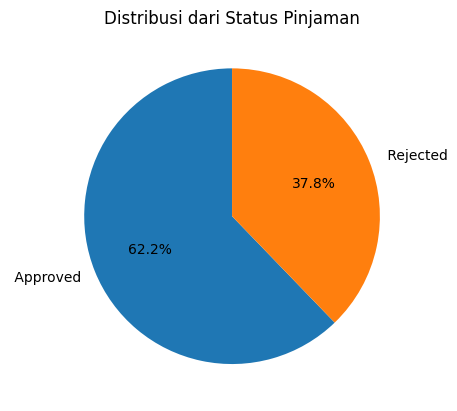

In [9]:
# Pie chart untuk melihat persentase dari status pinjaman (loan_status)
persentase_status_pinjaman = loan['loan_status'].value_counts()
plt.pie(persentase_status_pinjaman, labels=persentase_status_pinjaman.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi dari Status Pinjaman')
plt.show()

Terlihat dari visualisasi pie chart diatas bahwa persentase pinjaman yang disetujui adalah sebesar 62.2% sedangkan pinjaman yang ditolak adalah sebesar 37.8%. Dapat disimpulkan bahwa dari dataset tersebut persentase pinjaman yang disetujui lebih besar dibandingkan dengan persentase pinjaman yang ditolak.

## Bagaimana perbandingan skor kredit terhadap status pinjaman?

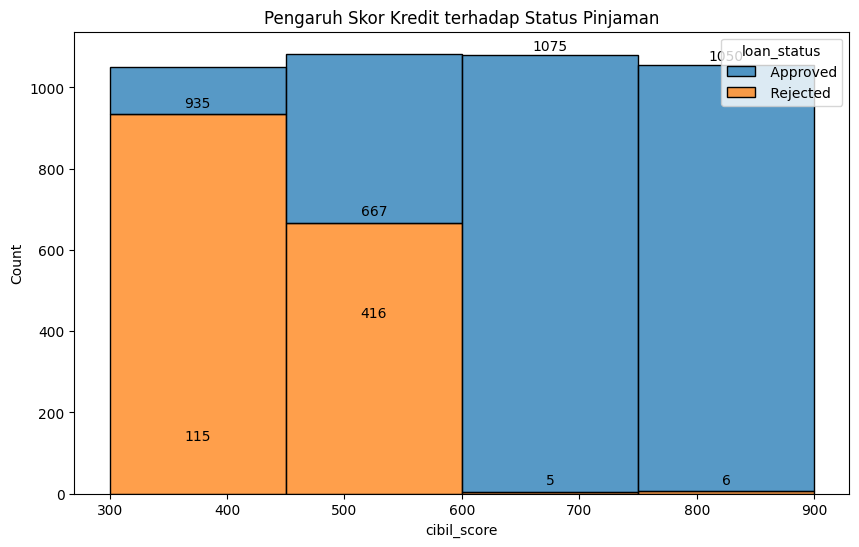

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=loan, x='cibil_score', bins=4, hue='loan_status', multiple='stack')

# Menambahkan angka pada tiap bin
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Pengaruh Skor Kredit terhadap Status Pinjaman')
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa semakin tinggi nilai kredit skor, maka semakin besar peluang permohonan pinjaman disetujui.

## Bagaimana perbandingan status pendidikan terhadap status pinjaman?

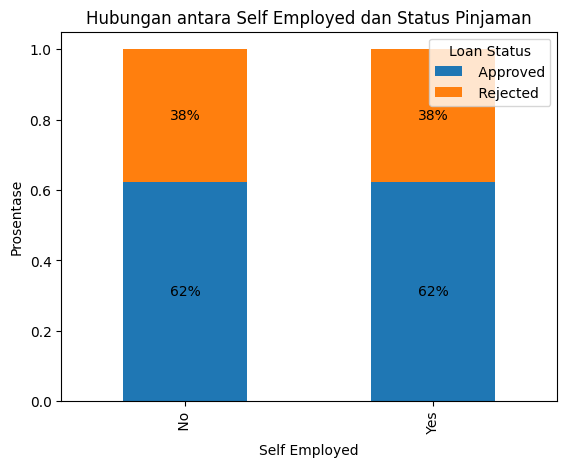

In [11]:
# Merata-ratakan jumlah status pinjaman pada masing-masing self_employed 'Yes' dan 'No'
avg_loan_status = loan.groupby('self_employed')['loan_status'].value_counts(normalize=True).unstack()

# Barplot
ax = avg_loan_status.plot(kind='bar', stacked=True)
plt.title('Hubungan antara Self Employed dan Status Pinjaman')
plt.xlabel('Self Employed')
plt.ylabel('Prosentase')
plt.legend(title='Loan Status', loc='upper right')

# Menambahkan label persentase pada setiap bagian dari bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

Dari visualisasi diatas, dapat disimpulkan bahwa status pekerjaan pemohon baik yang bekerja maupun yang tidak bekerja tidak berdampak signifikan terhadap status pinjaman. Terlihat bahwa jumlah status pinjaman disetujui dan pinjaman ditolak pada setiap status pekerjaan memiliki persentase yang sama, yaitu pinjaman disetujui sebesar 62% dan pinjaman ditolak sebesar 38%.

## Bagaimana distribusi data dari jumlah pinjaman? Sebutkan juga 3 jumlah pinjaman tertinggi

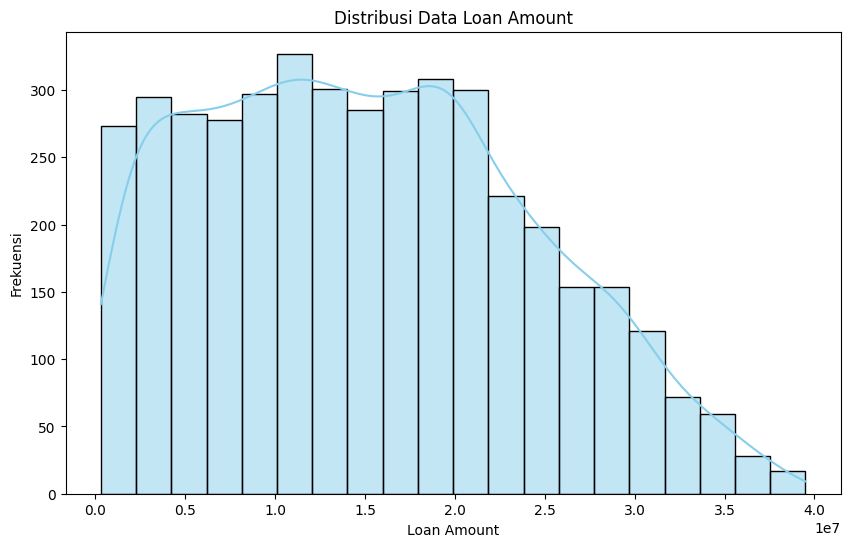

3 Jumlah Pinjaman Tertinggi:
509     39500000
258     38800000
1027    38700000
Name: loan_amount, dtype: int64


In [12]:
# Visualisasi distribusi data loan_amount menggunakan histogram
plt.figure(figsize=(10, 6))
sns.histplot(loan['loan_amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Data Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frekuensi')

# Menampilkan visualisasi
plt.show()

# Menemukan 3 Jumlah Pinjaman Tertinggi
top_n = 3 
top_credit_limit_customers = loan.nlargest(top_n, 'loan_amount')

# Menampilkan 3 Jumlah Pinjaman Tertinggi
print("3 Jumlah Pinjaman Tertinggi:")
print(top_credit_limit_customers['loan_amount'])

Dari visualisasi histogram diatas dapat terlihat untuk persebaran distribusi data loan_amount menunjukkan adanya kemiringan ke kanan (positif) dan ekor distribusi lebih panjang ke sebelah kanan. Kemudian untuk 3 jumlah pinjaman tertinggi diposisi pertama adalah pemohon dengan loan ID 509 dengan jumlah pinjaman sebesar 39.500.000, kemudian diposisi kedua adalah pemohon dengan loan ID 258 dengan jumlah pinjaman sebesar 38.800.000, dan diposisi ketiga adalah pemohon dengan loan ID 1027 dengan jumlah pinjaman sebesar 38.700.000

## Bagaimana perbandingan jangka waktu pinjaman terhadap status pinjaman?

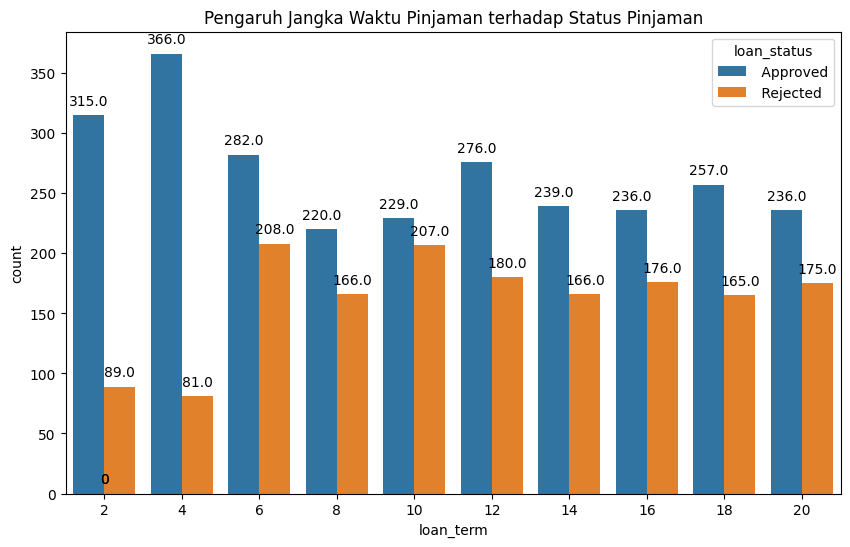

In [13]:
# Memvisualisasikan pengaruh jangka waktu pinjaman terhadap status pinjaman
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='loan_term', hue='loan_status', data=loan)

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Pengaruh Jangka Waktu Pinjaman terhadap Status Pinjaman')
plt.show()


Berdasarkan visualisasi diatas, dapat dilihat bahwa pinjaman dengan jangka waktu yang lebih lama cenderung lebih sering ditolak daripada pinjaman dengan jangka waktu yang lebih pendek. Sedangkan pinjaman dengan jangka waktu yang lebih pendek cenderung memiliki peluang yang lebih besar untuk disetujui.

## Bagaimana hubungan antara Jumlah Pendapatan per Tahun terhadap vs Jumlah Pinjaman?

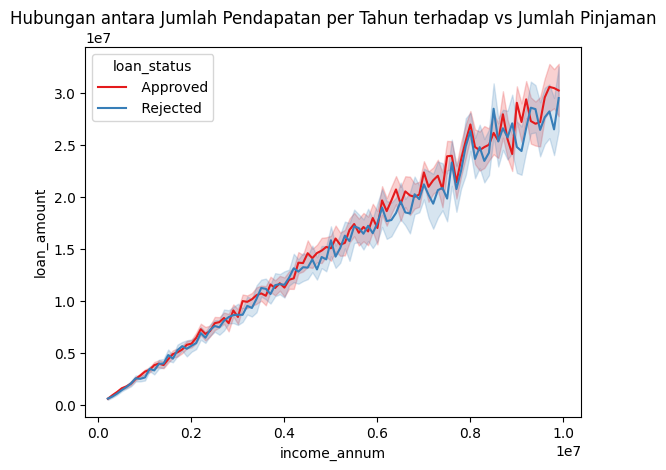

In [14]:
sns.lineplot(x='income_annum', y='loan_amount', data=loan, hue='loan_status', palette='Set1')
plt.title('Hubungan antara Jumlah Pendapatan per Tahun terhadap vs Jumlah Pinjaman')
plt.show()

Visualisasi diatas menunjukkan bahwa ada kemungkinan antara jumlah pendapatan pertahun dengan jumlah pinjaman memiliki korelasi positif. Artinya semakin tinggi jumlah pendapatan pertahun, maka semakin besar jumlah pinjaman yang diajukan.

# 4. Feature Engineering

## 4.1 Pra processing

### Pengecekan Data Duplicate

In [15]:
# Melakukan pengecekan data duplicate
loan_copy.duplicated().sum()

0

Data diatas menunjukkan tidak terdapat data duplicate pada setiap kolom.

### Pengecekan Missing Values

In [16]:
# Melihat apakah terdapat missing value pada data.
loan_copy.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Data diatas menunjukkan tidak terdapat missing values pada setiap kolom.

### Pengecekan Cardinality

In [17]:
# Membuat looping untuk unique values dari setiap kolom
listItem = []
for col in loan_copy.columns:
    listItem.append([col, loan_copy[col].nunique()])

# Membuat dataframe baru
unique_values = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unique Value'],
                             data=listItem)

# Menampilkan data
unique_values


,Nama Kolom,Jumlah Unique Value
0,loan_id,4269
1,no_of_dependents,6
2,education,2
3,self_employed,2
4,income_annum,98
5,loan_amount,378
6,loan_term,10
7,cibil_score,601
8,residential_assets_value,278
9,commercial_assets_value,188


Dari hasil pengecekan cardinality, terlihat bahwa beberapa kolom yang memiliki cardinality rendah (sedikit nilai unik), dan ada juga beberapa kolom lainnya memiliki cardinality tinggi (banyak nilai unik). Cardinality yang rendah dapat memudahkan analisis, sedangkan cardinality yang tinggi dapat menunjukkan variasi yang lebih besar dalam data.

In [18]:
# Mengganti nilai pada loan_status menjadi approved = 1 dan rejected = 0
loan_copy['loan_status'] = loan_copy['loan_status'].map({' Approved': 1, ' Rejected': 0})

# Menampilkan data
loan_copy['loan_status']

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

Terlihat dari hasil diatas telah berhasil dilakukan perubahan pada kategori 'loan_status' dimana 'Approved': 1, ' Rejected': 0, hal ini di lakukan untuk memudahkan data training 

## 4.2 Define Kolom Categorical dan Kolom Numerical

### A. Kolom Categorical

Pada pengecekan korelasi kolom categorical ini akan menggunakan uji Kendall

In [19]:
# Membuat variabel baru yang berisi kolom categorical
categorical_columns = loan_copy[['loan_id',
                                 'no_of_dependents',
                                 'education',
                                 'self_employed',
                                 'loan_term',
                                 'loan_status'
                                 ]]

In [20]:
# Menggunakan uji Kendall
for i in categorical_columns:
     
    corr, pval = stats.kendalltau(loan_copy[i],loan_copy['loan_status'])
    print(f"{i} dengan Loan Status")
    print(f"Nilai korelasi :{corr}")
    if pval < 0.05:
        print(f"P-value :{pval} -> Terdapat Korelasi")
    else:
        print(f"P-value :{pval} -> Tidak ada Korelasi")

    print()

loan_id dengan Loan Status
Nilai korelasi :0.014441467219101053
P-value :0.24794198312880267 -> Tidak ada Korelasi

no_of_dependents dengan Loan Status
Nilai korelasi :-0.015977135991766887
P-value :0.23662633243605036 -> Tidak ada Korelasi

education dengan Loan Status
Nilai korelasi :-0.004917865960694056
P-value :0.7479952953723881 -> Tidak ada Korelasi

self_employed dengan Loan Status
Nilai korelasi :0.00034450753494382863
P-value :0.9820438043874453 -> Tidak ada Korelasi

loan_term dengan Loan Status
Nilai korelasi :-0.09827455673589984
P-value :6.586624607501219e-14 -> Terdapat Korelasi

loan_status dengan Loan Status
Nilai korelasi :1.0
P-value :0.0 -> Terdapat Korelasi



Dari hasil uji Kendall pada kolom categorical diatas, dapat terlihat bahwa kolom 'loan_term' memiliki nilai korelasi 0.098 dan nilai P 6.58 yang artinya kolom tersebut memiliki korelasi dengan kolom target 'loan_status'. Sehingga kolom 'loan_term' tersebut dipilih sebagai feature.

### B. Kolom Numerical

Pada pengecekan korelasi kolom categorical ini akan menggunakan uji Pearson

In [21]:
# Membuat variabel baru yang berisi kolom numerical
numerical_columns = loan_copy[['income_annum',
                                'loan_amount',
                                'cibil_score',
                                'residential_assets_value',
                                'commercial_assets_value',
                                'luxury_assets_value',
                                'bank_asset_value',
                                'loan_status'
                                ]]

disini harusnya masukin kolom target

<Axes: >

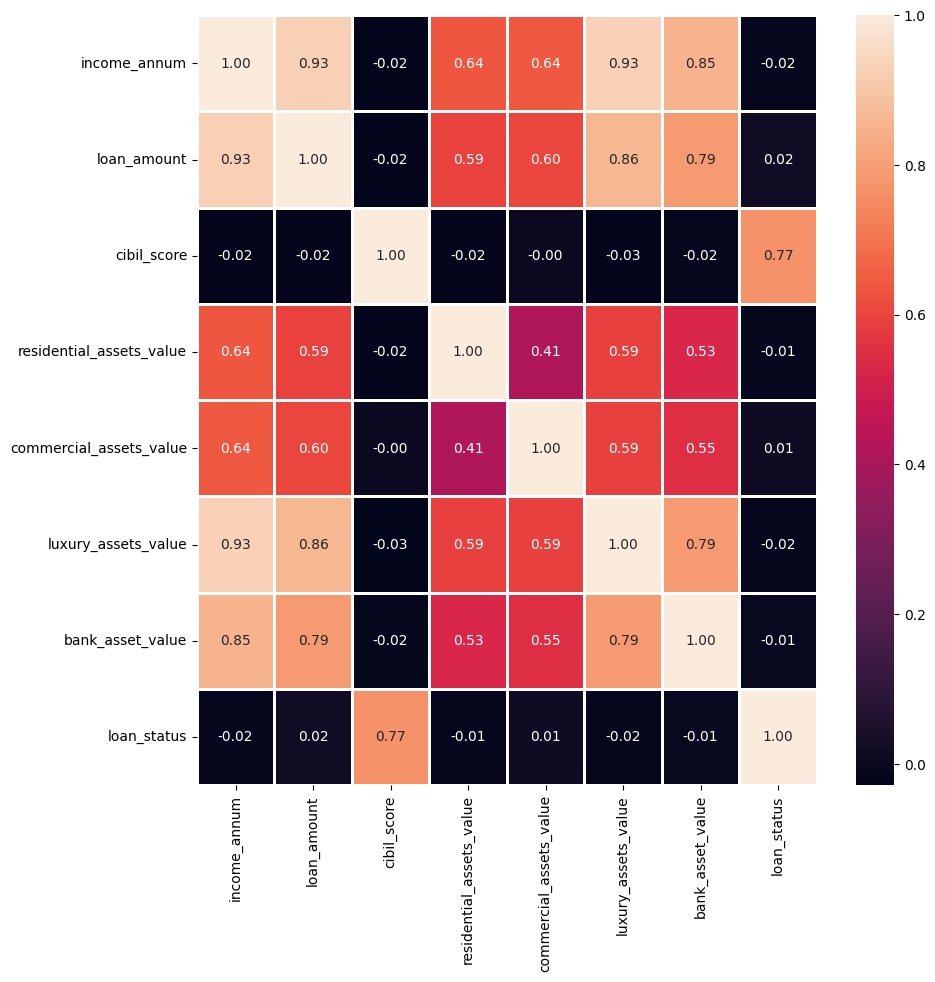

In [22]:
# Menggunakan uji Pearson
plt.figure(figsize=(10,10))
sns.heatmap(numerical_columns.corr(method='pearson'),annot=True,fmt=".2f",linewidths="1")

Dari hasil uji Pearson pada kolom numerical diatas, dapat terlihat bahwa hanya kolom 'cibil_score' yang memiliki korelasi dengan kolom target 'loan_status'. Sehingga kolom tersebut dipilih sebagai feature. 

### C. Hasil Feature Selection

Dari hasil nilai korelasi yang sebelumnya sudah dilakukan, didapatkan 2 feature, yaitu :

- Kolom 'loan_term' dengan nilai korelasi 0.09

- Kolom 'cibil_score' dengan nilai korelasi 0.77


### Menyimpan Hasil Feature Selection

In [23]:
loan_selection = loan_copy[['loan_term','cibil_score','loan_status']]

# Menampilkan data
loan_selection.head(10)

,loan_term,cibil_score,loan_status
0,12,778,1
1,8,417,0
2,20,506,0
3,8,467,0
4,20,382,0
5,10,319,0
6,4,678,1
7,20,382,0
8,20,782,1
9,10,388,0


## 4.3 Split Data

Dilakukan untuk memisahkan data training dan data set

In [24]:
# Menampilkan data
print(f"Proporsi value 0 : {loan_selection['loan_status'].value_counts()[0] / loan.shape[0] * (100/100)}")
print(f"Proporsi value 1 : {loan_selection['loan_status'].value_counts()[1] / loan.shape[0] * (100/100)}")

Proporsi value 0 : 0.3778402436167721
Proporsi value 1 : 0.622159756383228


In [25]:
x = loan_selection.drop(['loan_status'],axis=1)
y = loan_selection['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=40,stratify=y)

# Pengecekan komposisi data
print(f"Shape x_train : {x_train.shape}")
print(f"Shape x_test : {x_test.shape}")

Shape x_train : (2561, 2)
Shape x_test : (1708, 2)


## 4.4 Multicollinear/VIF

Dilakukan untuk mengidentifikasi variabel-variabel yang memiliki multicollinearity dan menghapus variabel yang redundan untuk meningkatkan stabilitas model. VIF mengukur sejauh mana varians dari suatu variabel dapat diprediksi oleh variabel lain dalam model.

Pada uji VIF, akan dilakukan penghapusan feature yang memiliki nilai VIF lebih dari 5. Hal ini dilakukan karena feature yang memiliki nilai VIF di atas 5 memiliki tingkat multicollinearity yang cukup tinggi dibandingkan dengan feature lain yang nantinya akan berdampak pada kualitas model yang dibuat. 

In [26]:
# Uji VIF (Variance Inflation Factor)
def calc_vif(x):

    # Menghitung nilai VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [27]:
# Menampilkan data
calc_vif(x_train)

,variables,VIF
0,loan_term,3.646752
1,cibil_score,3.646752


Setelah dilakukan pengecekan nilai VIF, dapat terlihat tidak ada feature yang memiliki nilai VIF lebih dari 5. Maka tidak perlu dilakukan penanganan apapun.

In [28]:
# Menyimpan hasil VIF pada x_train dan pada x_test
feature = x_train.columns.tolist()
x_test = x_test[feature]

## 4.5 Skewness Check

Dilakukan untuk pengecekan distribusi data skewness atau normal. Yang nantinya akan diperlukan untuk penanganan terhadap nilai-nilai ekstrim

In [29]:
# Membuat variabel baru yang berisi feature selection numerical
num_cols = x_train[['cibil_score']]

Sesuai informasi sebelumnya, untuk kolom 'loan_term' adalah categorical yang telah dilakukan encoding. Jadi untuk pengecekan skewness dan handling outliers hanya pada kolom 'cibil_score'.

In [30]:
# Membuat list kosong yang nantinya diisi kolom numerical
skew = []
normal = []

# Mencari feature yang termasuk kedalam skewed atau normal
for column in num_cols:
    skewness = num_cols[column].skew()
    if skewness < -0.5 or skewness > 0.5:
        
# Variabel skew
        skew.append(column)
    elif skewness >= -0.5 or skewness <= 0.5:

# Variabel normal
        normal.append(column)

# Menampilkan data
print(f"Skew Column : {skew}")
print(f"Normal Column : {normal}")

Skew Column : []
Normal Column : ['cibil_score']


Dari hasil diatas dapat terlihat bahwa yang tidak ada kolom yang termasuk kedalam kolom yang terdistribusi secara tidak normal (skew).

## 4.6 Handling Outliers

Dilakukan untuk menangani nilai-nilai ekstrim pada data. Pada bagian ini dilakukan penanganan terhadap ouliers dengan menggunakan metode Gaussian karena sesuai informasi pada pengecekan nilai skewness, kolom yang akan dilakukan handling outliers (kolom 'cibil_score') diasumsikan terdistribusi secara normal.

In [31]:
# Melakukan winsorizing pada kolom numerical
for i in num_cols:
    wz_numeric = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=[i])
    num_cols[i] = wz_numeric.fit_transform(num_cols[[i]])

cibil_score - After Capping


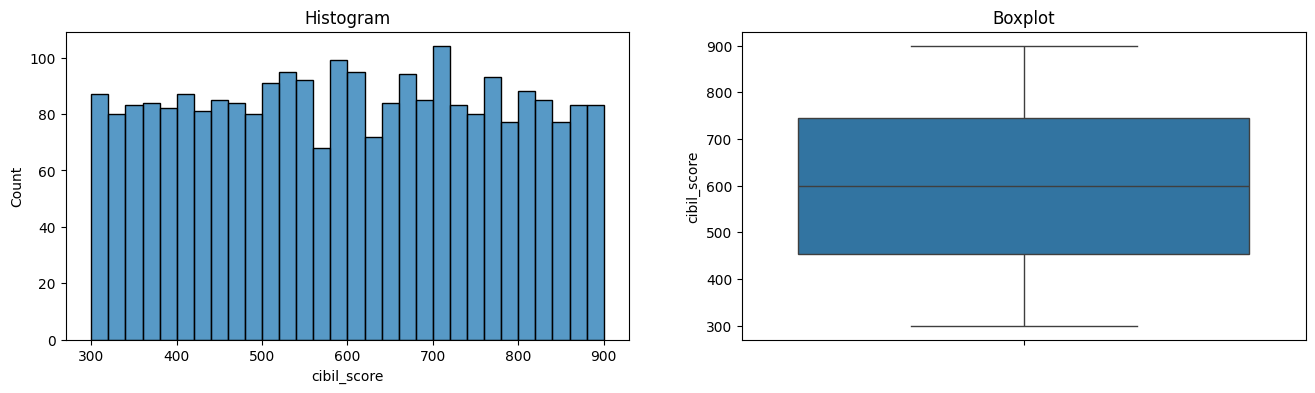

In [32]:
# Fungsi untuk membuat plot histogram dan boxplot sebelum dan sesudah capping
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Menampilkan plot setelah dilakukan capping untuk fitur
for i in num_cols:
    print(f'{i} - After Capping')
    diagnostic_plots(num_cols, i)

Dari visualisasi diatas, dapat dilihat bahwa tidak terdapat outliers pada data.

In [33]:
# Menyimpan data
num_cols = wz_numeric.fit_transform(x_train)

## 4.7 Balancing Data

Digunakan untuk menyeimbangkan jumlah data agar hasil prediksi lebih akurat dan tidak terpengaruh oleh ketidakseimbangan jumlah data 

In [34]:
# Menampilkan data sebelum dilakukan balancing
y_train.value_counts(normalize=True) * 100

loan_status
1    62.202265
0    37.797735
Name: proportion, dtype: float64

Sebelum dilakukan balancing data, terlihat jumlah data pada target 'loan_status' tidak seimbang. Maka perlu dilakukan balancing dengan oversampling menggunakan SMOTE

In [35]:
# Membuat objek SMOTE
smote = SMOTE()

# Oversampling pada data training
x_train, y_train = smote.fit_resample(x_train, y_train)

# Oversampling pada data test (opsional)
x_test, y_test = smote.fit_resample(x_test, y_test)

# Menampilkan jumlah nilai pada setiap kelas setelah oversampling
print("Jumlah nilai pada setiap kelas setelah oversampling pada data training:")
print(y_train.value_counts())


Jumlah nilai pada setiap kelas setelah oversampling pada data training:
loan_status
1    1593
0    1593
Name: count, dtype: int64


Setelah dilakukan balancing, terlihat jumlah data sudah seimbang. Balancing oversampling dilakukan dengan cara penambahan pada kelas minoritas agar jumlah datanya sama dengan jumlah data pada kelas mayoritas. 

Selain itu, hasil model menggunakan balancing data oversampling lebih baik dibandingkan dengan undersampling juga untuk jumlah data hanya sekitar 900 setiap kelas jika menggunakan undersampling. Jadi dipilih metode oversampling.

## 4.8 Scalling & Encoding

Scalling dilakukan untuk memastikan bahwa semua feature pada data memiliki rentang nilai yang sebanding, metode yang digunakan adalah metode Standard Scaler. StandardScaller digunakan karena diasumsikan datanya terdistribusi secara normal.

Kemudian Encoding dilakukan untuk mengubah data categorical menjadi numerical. Namun pada bagian ini tidak perlu dilakukan encoding karena pada data yang diterima kolom 'loan_term' sudah di encoding.

In [36]:
# Scaling Method menggunakan StandardScaler
scaler = StandardScaler()

# Define 

# Define kolom numerical
scale_num_cols = x_train.select_dtypes(include=np.number).columns.tolist()

# Create ColumnTransfomer
preprocessing = ColumnTransformer(
    transformers=[
        ('scale', scaler, scale_num_cols), # scale kolom numerical
        ('passthrough', 'passthrough', ['loan_term'])
    ]
)

Data sudah berhasil dilakukan scalling. Tidak dilakukan encode karena tidak ada data categorical.


# 5. Model Definition

Dilakukan untuk mendefinisikan model yang digunakan

## 5.1 K-Nearest Neighbors (KNN) 

In [37]:
# Membuat pipeline KNN
knn_pipe = Pipeline([('preprocessor', preprocessing), ('knn', KNeighborsClassifier())])

## 5.2 Support Vector Machine (SVM) 

In [38]:
# Membuat pipeline SVM
svm_pipe = Pipeline([('preprocessor', preprocessing), ('svm', SVC(random_state=42))])

## 5.3 Random Forest

In [39]:
# Membuat pipeline Random Forest
rf_pipe = Pipeline([('preprocessor', preprocessing), ('rf', RandomForestClassifier(random_state=42))])

## 5.4 Decision Tree

In [40]:
# Membuat pipeline Decision Tree
dt_pipe = Pipeline([('preprocessor', preprocessing), ('dt', DecisionTreeClassifier(random_state=42))])

## 5.5 Gradient Boosting

In [41]:
# Membuat pipeline GB (Gradient Boosting)
gb_pipe = Pipeline([('preprocessor', preprocessing), ('gb', GradientBoostingClassifier())])

# 6. Model Training & Evaluation

Dilakukan untuk mengajari/men-training dan mengevaluasi model yang digunakan dan menentukan model yang terbaik.

## 6.1 Cross Validation Base Model

Pemilihan matrix 'precision' adalah untuk mengevaluasi sejauh mana model dapat memberikan prediksi yang akurat terkait dengan kelas positif (misalnya, kasus "Approved" pada dataset pinjaman). Matrix 'precision' akan memberikan perbandingan antara jumlah kasus positif yang benar diprediksi dibandingkan dengan total kasus yang diprediksi sebagai positif oleh model, sehingga memberikan indikasi seberapa baik model dapat mengidentifikasi kasus yang benar-benar relevan. Dalam konteks pinjaman, 'precision' dapat membantu mengukur seberapa akurat model dapat memprediksi persetujuan pinjaman.

In [42]:
# Set StratifiedKFold
skfold = StratifiedKFold(n_splits=5)

# Checking cross-validation score with precision as the scoring metric
cv_knn_model = cross_val_score(knn_pipe, x_train, y_train, cv=skfold, scoring="precision")
cv_svm_model = cross_val_score(svm_pipe, x_train, y_train, cv=skfold, scoring="precision")
cv_rdf_model = cross_val_score(rf_pipe, x_train, y_train, cv=skfold, scoring="precision")
cv_tree_model = cross_val_score(rf_pipe, x_train, y_train, cv=skfold, scoring="precision")
cv_gb_model = cross_val_score(gb_pipe, x_train, y_train, cv=skfold, scoring="precision")

name_model = []
cv_scores = 0

for cv, name in zip([cv_knn_model, cv_svm_model, cv_tree_model, cv_rdf_model, cv_gb_model],
                    ['knn_model', 'svm_model', 'rdf_model', 'tree_model', 'gb_model']):

    print(name)
    print('precision - All - Cross Validation  : ', cv)
    print('precision - Mean - Cross Validation : ', cv.mean())
    print('precision - Std - Cross Validation  : ', cv.std())
    print('precision - Range of Test-Set       : ', (cv.mean() - cv.std()), '-', (cv.mean() + cv.std()))
    print('-' * 50)

    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name

    else:
        pass

print('best model:', name_model)
print('cross-val mean:', cv_scores)


knn_model
precision - All - Cross Validation  :  [0.94392523 0.965625   0.96214511 0.97727273 0.9869281 ]
precision - Mean - Cross Validation :  0.967179235180569
precision - Std - Cross Validation  :  0.014562987822580906
precision - Range of Test-Set       :  0.9526162473579881 - 0.98174222300315
--------------------------------------------------
svm_model
precision - All - Cross Validation  :  [0.93569132 0.95833333 0.96141479 0.96527778 0.95016611]
precision - Mean - Cross Validation :  0.9541766666785361
precision - Std - Cross Validation  :  0.010494718993471876
precision - Range of Test-Set       :  0.9436819476850642 - 0.9646713856720079
--------------------------------------------------
rdf_model
precision - All - Cross Validation  :  [0.93902439 0.96573209 0.96835443 0.97411003 0.97749196]
precision - Mean - Cross Validation :  0.9649425803256626
precision - Std - Cross Validation  :  0.013605482436289187
precision - Range of Test-Set       :  0.9513370978893734 - 0.978548062

Dari hasil cross validation menggunakan matrix precision diatas, didapatkan hasil bahwa model terbaik adalah GB Model (Gradient Boosting Model) dengan hasil sebesar 97%. Selanjutnya dilakukan evaluasi terhadap model GB (Gradient Boosting) dengan hyperparameter.

## 6.2 Best Model dengan Hyperparameter

In [43]:
# Menentukan parameter yang akan dioptimalkan untuk GB
gb_params = {
    'gb__n_estimators': [10, 5, 10],  # Jumlah pohon keputusan
    'gb__learning_rate': [0.01, 0.1, 0.2],  # Tingkat pembelajaran
    'gb__max_depth': [3, 4, 5],  # Kedalaman maksimum pohon
}

# Membuat objek GridSearchCV untuk hyperparameter tuning GB
grid = GridSearchCV(estimator=gb_pipe,
                       param_grid=gb_params,
                       cv=5,
                       n_jobs=-1,
                       verbose=3,
                       scoring='precision')

# Melakukan hyperparameter tuning untuk GB
grid.fit(x_train, y_train)

# Menampilkan hasil tuning untuk GB
print("Best parameters for GB:", grid.best_params_)
print("Best precision score for GB:", grid.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[CV 1/5] END gb__learning_rate=0.01, gb__max_depth=3, gb__n_estimators=10;, score=0.977 total time=   0.0s
[CV 1/5] END gb__learning_rate=0.01, gb__max_depth=3, gb__n_estimators=5;, score=0.977 total time=   0.0s
[CV 4/5] END gb__learning_rate=0.01, gb__max_depth=3, gb__n_estimators=5;, score=0.974 total time=   0.0s
[CV 3/5] END gb__learning_rate=0.01, gb__max_depth=3, gb__n_estimators=5;, score=0.993 total time=   0.0s
[CV 5/5] END gb__learning_rate=0.01, gb__max_depth=3, gb__n_estimators=10;, score=0.983 total time=   0.0s
[CV 3/5] END gb__learning_rate=0.01, gb__max_depth=3, gb__n_estimators=10;, score=0.993 total time=   0.0s
[CV 4/5] END gb__learning_rate=0.01, gb__max_depth=3, gb__n_estimators=10;, score=0.990 total time=   0.0s
[CV 5/5] END gb__learning_rate=0.01, gb__max_depth=3, gb__n_estimators=5;, score=0.983 total time=   0.0s
[CV 2/5] END gb__learning_rate=0.01, gb__max_depth=3, gb__n_estimators=10;, score=0.993 total time=   0.0s
[CV 2/5] END gb__learning_rate=0.01, gb__

Dari hasil diatas, dapat disimpulkan bahwa:


1. **Model Terbaik:**
   Model terbaik adalah Gradient Boosting (GB) dengan hyperparameter:
   - Learning rate: 0.1
   - Max depth: 3
   - Jumlah estimator: 10


2. **Kesimpulan:**
   - Model ini dipilih karena memberikan hasil paling baik dibanding model lain.
   - Learning rate 0.1 menunjukkan seberapa besar model belajar dari kesalahan sebelumnya.
   - Max depth 3 menandakan kedalaman maksimal pohon keputusan dalam model.
   - Jumlah estimator 10 adalah jumlah pohon keputusan yang digunakan dalam model.


3. **Keunggulan Model GB:**
   - Model GB mampu memberikan prediksi dengan tingkat keakuratan yang sangat tinggi, dengan skor presisi mencapai 98%%.
   - Learning rate yang optimal dan kedalaman pohon yang terkontrol membantu mencegah overfitting atau underfitting.
   - Penggunaan 10 estimator memberikan keseimbangan antara keakuratan dan efisiensi komputasi.


4. **Kesimpulan Skor Tinggi:**
   - Skor presisi yang tinggi (99.1%) menunjukkan bahwa model mampu dengan akurat memprediksi hasil.
   - Hasil ini dapat diandalkan untuk memutuskan persetujuan atau penolakan pinjaman dengan sangat baik.

In [44]:
# Mendapatkan model terbaik dengan hyperparameter
best_model_gb = grid.best_estimator_

In [45]:
# Memprediksi nilai target pada data train dan test menggunakan model terbaik
y_train_pred = best_model_gb.predict(x_train)
y_test_pred = best_model_gb.predict(x_test)

# Menampilkan laporan klasifikasi untuk data train
print("="*25,"MODEL TRAINING","="*25)
print(classification_report(y_train,y_train_pred))
print("\n")

# Menampilkan laporan klasifikasi untuk data test
print("="*25,"MODEL TEST","="*25)
print(classification_report(y_test,y_test_pred))

========================= MODEL TRAINING =========================
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1593
           1       0.99      0.94      0.96      1593

    accuracy                           0.96      3186
   macro avg       0.96      0.96      0.96      3186
weighted avg       0.96      0.96      0.96      3186



========================= MODEL TEST =========================
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1063
           1       0.99      0.94      0.96      1063

    accuracy                           0.96      2126
   macro avg       0.96      0.96      0.96      2126
weighted avg       0.96      0.96      0.96      2126



Berdasarkan laporan klasifikasi diatas, baik model training maupun model test terlihat sangat baik. Dapat disimpulkan bahwa:

1. Kinerja Model:
    - Akurasi model pada data training sekitar 96%, yang berarti model berhasil memprediksi 96% dari total data training dengan benar.
    - Pada data testing, model juga mencapai akurasi sekitar 96%, menunjukkan kemampuan prediksi yang baik.

2. Precision, Recall, dan F1-Score:

    - Precision mengukur seberapa sering model memprediksi data sebagai positif, dan seberapa benar prediksi tersebut. Nilai presisi untuk kelas 0 dan 1 di data training dan testing sangat tinggi, sekitar 94% hingga 99%.
    
    - Recall mengukur seberapa baik model dapat menangkap semua data yang seharusnya positif. Nilai recall juga tinggi untuk kedua kelas di data training dan testing.
    
    - F1-score, menggabungkan presisi dan recall, menunjukkan keseimbangan antara keduanya. F1-score yang tinggi menunjukkan kinerja model yang baik.

3. Nilai Precision yang sama pada model train dan model test:

    - Nilai precision yang sama antara data training dan testing bisa disebabkan oleh distribusi data yang seimbang di kedua set data train dan data test.
    - Model cenderung memberikan prediksi yang konsisten untuk kedua data, menghasilkan nilai precision yang mirip pada kedua set data.

Insight:

Meskipun hasilnya bagus, penting untuk memahami apakah model memiliki kecenderungan overfitting atau underfitting, dan apakah distribusi kelas seragam di seluruh dataset.

Confusion Matrix      : 


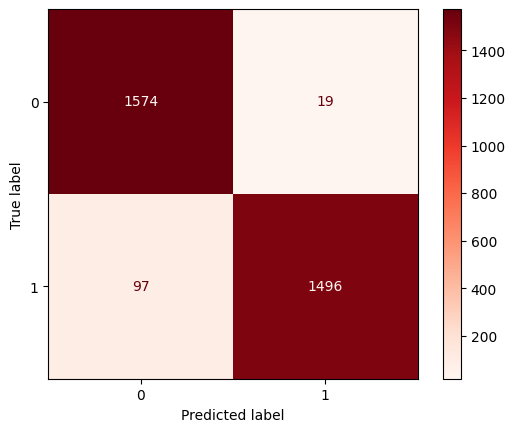

In [46]:
# Menampilkan Confussion Matrix data train
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_model_gb, x_train, y_train, cmap='Reds'))

Confusion Matrix      : 


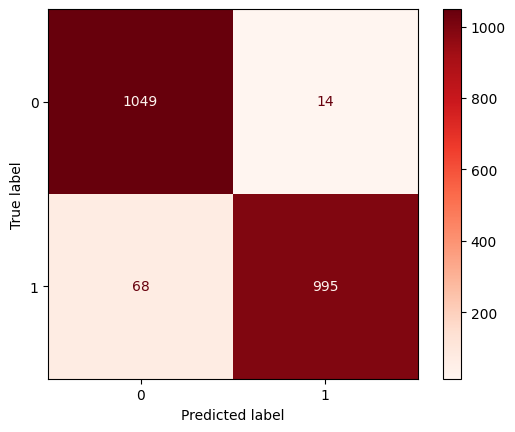

In [47]:
# Menampilkan Confussion Matrix data test
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_model_gb, x_test, y_test, cmap='Reds'))

# 7. Model Saving

In [48]:
# Menyimpan Model
import json
joblib.dump(best_model_gb, "model.pkl")

with open('feature.json','w') as f:
    json.dump(feature,f)

# 8. Model Inference

Ada pada notebook 'data_inference.ipynb'

# 9. Conclusion

**Kesimpulan:**

1. **Dataset:**
   - Dataset terdiri dari 4269 entri dengan 13 kolom termasuk kolom target, yaitu kolom `loan_status`.
   - Terdapat dua kategori pada kolom target: 'Approved' dan 'Rejected'. Kategori approved diganti menjadi 1 dan kategori rejected diganti menjadi 0.

2. **Data Preprocessing:**
   - Dilakukan oversampling untuk menangani ketidakseimbangan data dengan menggunakan SMOTE. Balancing data menggunakan oversampling dilakukan dengan cara penambahan pada kelas minoritas agar jumlah datanya sama dengan jumlah data pada kelas mayoritas. 
   - Melakukan pemilihan kolom feature berdasarkan nilai korelasi dengan target, dipilih kolom feature 'loan_term' dan 'cibil_score'.

3. **Modeling:**
   - Empat model klasifikasi yang diuji: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest (RF),  Decision Tree (Tree), dan Gradient Boosting (GB).
   - Model Gradient Boosting (GB) dipilih sebagai model terbaik berdasarkan hasil cross-validation dan evaluasi kinerja pada data test.

4. **Evaluasi Model:**
   - Matrix evaluasi yang dipilih adalah precision. Alasan penggunaannya karena dalam konteks pinjaman, matrix 'precision' dapat membantu mengukur seberapa akurat model dapat memprediksi persetujuan pinjaman.
   - Model Gradient Boosting memberikan hasil precision yang sama pada data training dan data test, yaitu untuk kelas 0 (pinjaman ditolak) sebesar 94% dan untuk kelas 1 (pinjaman disetujui) sebesar 99%. 

5. **Kelebihan dan Kekurangan Model GB:**
   - **Kelebihan:** Cenderung emiliki akurasi yang tinggi karena mampu memperbaiki kesalahan prediksi model sebelumnya
   - **Kekurangan:** rentan terhadap overfitting


# 10. Conceptual Problem

## 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Latar Belakang Bagging:

Bagging (Bootstrap Aggregating) digunakan untuk meningkatkan stabilitas dan akurasi model dengan menggabungkan hasil prediksi dari beberapa model yang dilatih pada data set acak dari data training.

Cara Kerja Bagging:

Bagging bekerja dengan membuat beberapa data set acak dari data training, lalu melatih model pada setiap data set, dan kemudian menggabungkan hasil prediksi dari setiap model untuk menghasilkan prediksi akhir.

## 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

- Random Forest:

    - Cara Kerja:

        Membentuk sejumlah kelompok keputusan secara terpisah, masing-masing dilatih secara acak dari data train. Hasil prediksi dari setiap kelompok diambil melalui rata-rata untuk menghasilkan prediksi akhir.


- Gradient Boosting:

    - Cara Kerja: 

        Membentuk sejumlah kelompok keputusan secara berurutan, setiap kelompok dibuat untuk memperbaiki kesalahan prediksi model sebelumnya. Prediksi akhir adalah hasil penjumlahan prediksi dari setiap kelompok, memberi bobot lebih pada kelompok yang memiliki performa lebih baik.


## 3. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross Validation adalah teknik untuk menguji performa suatu model dengan membagi data menjadi beberapa set, melatih model pada sebagian data set, dan menguji pada data set yang tidak dilatih, sehingga mendapatkan estimasi yang lebih reliabel tentang seberapa baik model dapat digeneralisasi ke data baru.